## **Section 4.3: Scriptless Version of our Attack**

- With this experiment, we investigated whether users with Tor Browser security level *high* are still vulnerable to our attack. We find that they are albeit at lower lookup rates than when JavaScript is available.
- We embedded `180` (the total number of injections over `60` seconds at `3` injections per second) image subresources on non-existing onion addresses in a `noscript` tag.
- The data was collected on our university desktop machine.
- The list of `100` sampled guards we visited `3` times each is: `2020-09-22-18-36-48_guards_num_sampled_from_guard_prob-100.csv`.
- We thus expect `3 * 100 = 300` result folders.
- We exclude the experiments with negative durations from further processing, which seems to be a side effect of `tor` failing to launch due to offline guards.

In [1]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from os.path import abspath, join, dirname, isfile

In [2]:
DATA_DIR = abspath("./4_data_scriptless-attack")
EXPERIMENT_PARAMS_JSON = "experiment.json"

In [3]:
def load_results(filter_re=None):

    result_tuples = []

    path = glob(join(DATA_DIR, "*", "results.json"))

    for results_json_path in path:

        if filter_re is not None and not re.match(
                filter_re, results_json_path):
            continue

        exp_json = join(dirname(results_json_path), EXPERIMENT_PARAMS_JSON)
        if not isfile(exp_json):
            continue

        exp_params = load_from_json(exp_json)
        results = load_from_json(results_json_path)
        results.update(exp_params)
        result_tuples.append(results)

    return result_tuples


def load_from_json(json_path):
    return json.loads(open(json_path).read())

### Load all Results into a DataFrame

In [4]:
result_tuples = load_results(".*MAX_HSDESC_RATE_NOJS.*COMPLETED.*")
df = pd.DataFrame.from_records(result_tuples)
df.head(15)

,run_time_sec,circ_built_per_sec,hsdesc_notfound_per_sec,circ_cnt,circ_built_cnt,circ_failed_cnt,circ_undetermined_cnt,hsdesc_cnt,hsdesc_recvd_cnt,hsdesc_notfound_cnt,...,guard_dir_port,circuit_log_interval,worker_buffer_time,main_tor_buffer_time,main_worker_buffer_time,excluded_circ_purposes,additional_torrc_params,no_js,failure_guard_is_hsdir_cnt,failure_guard_is_hsdir_path_attempts_cnt
0,6.559600e+01,14.741753,12.912373,1037,967,41,29,988,0,847,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
1,6.006600e+01,15.050112,12.103353,973,904,39,30,895,1,727,...,9030,1,15,7,15,[GENERAL],{},True,3.0,8934.0
2,5.994100e+01,15.632038,13.212993,1025,937,57,31,953,1,792,...,none,1,15,7,15,[GENERAL],{},True,1.0,1091.0
3,-6.311520e+10,-0.000000,-0.000000,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
4,6.116300e+01,16.022759,13.831892,1060,980,49,31,977,0,846,...,80,1,15,7,15,[GENERAL],{},True,0.0,7346.0
5,6.007600e+01,15.613556,12.750516,1032,938,63,31,937,1,766,...,80,1,15,7,15,[GENERAL],{},True,0.0,588.0
6,6.010100e+01,14.924876,13.177817,967,897,37,33,951,1,792,...,8000,1,15,7,15,[GENERAL],{},True,0.0,1089.0
7,-6.311520e+10,-0.000000,-0.000000,0,0,0,0,0,0,0,...,9090,1,15,7,15,[GENERAL],{},True,NaN,NaN
8,-6.311520e+10,-0.000000,-0.000000,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
9,-6.311520e+10,-0.000000,-0.000000,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN


In [5]:
# 100 guards x 3 runs per guard => 300 entries.
len(df)

300

### Negative Durations

- Experiments with negative durations seem to be the cases where `tor` fails to launch (e.g., due to an offline guard).
- Example `victim_client_events.log` in such instance:
```
2021-02-15 21:19:57:428 | [main] Assuming tshark_capture and conn_logger are done, starting postprocessing.
2021-02-15 21:20:05:361 | [tor_browser_worker0] Exception while running stem and Tor Browser: reached a 90 second timeout without success
Traceback (most recent call last):
  File "launch_attack.py", line 227, in tor_browser_worker
    tor_process = launch_tbb_tor_with_stem(tbb_path=tbb, torrc=torrc)
  File "/usr/local/lib/python3.8/dist-packages/tbselenium/utils.py", line 82, in launch_tbb_tor_with_stem
    return launch_tor_with_config(config=torrc, tor_cmd=tor_binary)
  File "/usr/local/lib/python3.8/dist-packages/stem/process.py", line 285, in launch_tor_with_config
    return launch_tor(tor_cmd, ['-f', '-'], None, completion_percent, init_msg_handler, timeout, take_ownership, close_output, stdin = config_str)
  File "/usr/local/lib/python3.8/dist-packages/stem/process.py", line 153, in launch_tor
    init_line = tor_process.stdout.readline().decode('utf-8', 'replace').strip()
  File "/usr/local/lib/python3.8/dist-packages/stem/process.py", line 136, in timeout_handler
    raise OSError('reached a %i second timeout without success' % timeout)
OSError: reached a 90 second timeout without success
```

In [6]:
df[df.run_time_sec<0]

,run_time_sec,circ_built_per_sec,hsdesc_notfound_per_sec,circ_cnt,circ_built_cnt,circ_failed_cnt,circ_undetermined_cnt,hsdesc_cnt,hsdesc_recvd_cnt,hsdesc_notfound_cnt,...,guard_dir_port,circuit_log_interval,worker_buffer_time,main_tor_buffer_time,main_worker_buffer_time,excluded_circ_purposes,additional_torrc_params,no_js,failure_guard_is_hsdir_cnt,failure_guard_is_hsdir_path_attempts_cnt
3,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
7,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9090,1,15,7,15,[GENERAL],{},True,NaN,NaN
8,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
9,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
10,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,80,1,15,7,15,[GENERAL],{},True,NaN,NaN
291,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,80,1,15,7,15,[GENERAL],{},True,NaN,NaN
297,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,9030,1,15,7,15,[GENERAL],{},True,0.0,89.0
298,-6.311520e+10,-0.0,-0.0,0,0,0,0,0,0,0,...,none,1,15,7,15,[GENERAL],{},True,NaN,NaN


In [7]:
# Negative durations are concentrated on 36 guards.
df[df.run_time_sec<0].guard_or_ip.nunique()

36

In [8]:
# Take only experiments with positive durations.
df = df[df.run_time_sec>0]

In [9]:
df.run_time_sec.describe()

count    194.000000
mean      59.774505
std        1.636248
min       54.124000
25%       59.848250
50%       60.156000
75%       60.505250
max       65.596000
Name: run_time_sec, dtype: float64

In [10]:
# Just take the columns we need for this notebook.
df = df[['rate_per_sec', 'circ_built_per_sec', 'hsdesc_notfound_per_sec', 'onion_ver', 'guard_fp', 'user', 'host']]

In [11]:
df.head(15)

,rate_per_sec,circ_built_per_sec,hsdesc_notfound_per_sec,onion_ver,guard_fp,user,host
0,5.0,14.741753,12.912373,3,7A3E534C033E3836BD5AF223B642853C502AB33A,gacar,lnx-desktop
1,5.0,15.050112,12.103353,3,BF0FB582E37F738CD33C3651125F2772705BB8E8,gacar,lnx-desktop
2,5.0,15.632038,13.212993,3,2AA5F598F9A1812F01CD99E3B59BB87362ED7438,gacar,lnx-desktop
4,5.0,16.022759,13.831892,3,77A56CB237740E24AEA2D61C8C8936232AFC1BD8,gacar,lnx-desktop
5,5.0,15.613556,12.750516,3,CD39C258265B25EAA4ABA4FDCB2DF98104CAA362,gacar,lnx-desktop
6,5.0,14.924876,13.177817,3,E3D61BAEA0B7CB12CACEDC8821C520557BDFCEA3,gacar,lnx-desktop
12,5.0,16.543996,14.074000,3,44BD70C13DAA7513D6F47773804178B009F21ED5,gacar,lnx-desktop
16,5.0,16.287386,14.076723,3,724E86E7F5DA715529DC0ECAA013AE4BDC680E4C,gacar,lnx-desktop
17,5.0,14.881548,12.679346,3,40CDE936B04B4573A47223396006443CA5EAC845,gacar,lnx-desktop
18,5.0,16.125259,13.986365,3,8BE79CE3261C027CE94F84D6CBE45F03BE9B8B59,gacar,lnx-desktop


In [12]:
df.hsdesc_notfound_per_sec.describe()

count    194.000000
mean      13.514506
std        0.931692
min        7.970129
25%       12.999361
50%       13.589106
75%       14.182644
max       15.242776
Name: hsdesc_notfound_per_sec, dtype: float64

### Success by Rate and Host

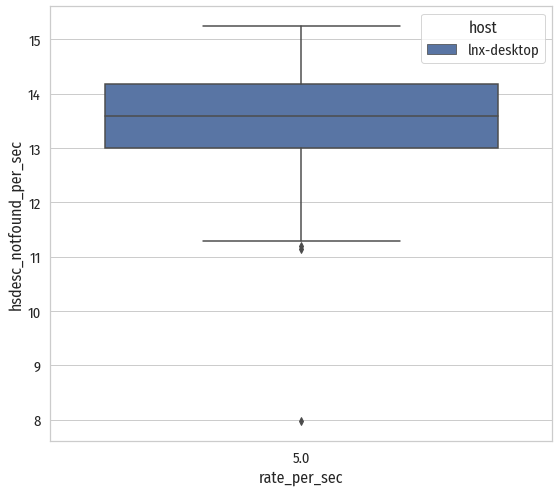

In [13]:
plt.figure(figsize=(9, 8))

sns.set()
sns.set(style="whitegrid", font_scale=1.33)
sns.set_style({"font.family": "Fira Sans Condensed"})

df.sort_values("host", inplace=True)

sns.boxplot(x="rate_per_sec", y="hsdesc_notfound_per_sec", hue="host", data=df)

plt.show()